## Personal Weather Station Evaluation

In [1]:
#### Imports

import sys,os,warnings,math,glob
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from datetime import datetime  
from datetime import timedelta 
warnings.filterwarnings('ignore')


In [2]:
#### Declarations

stations = ["IWATERLO57", "IWATERLO55", "IKITCHEN16", "IKITCHEN15", "IWOOLWIC7", "IONTARIO1036", "ICAMBRID183"]
my_station = "IWATERLO57"
study_year = 2019
colors = ["black", "blue", "orange", "purple", "cyan", "magenta", "red"]


In [19]:
def rmse(predictions, targets):
    return np.sqrt(np.nanmean((predictions - targets) ** 2))

def std(predictions, targets):
    return np.std(predictions - targets)

def give_summary(dat1, dat2):
    corr_val = pd.DataFrame({'STATION': dat1, 'SNODAS': dat2}).corr().STATION[1]
    rmse_val = rmse(np.array(dat2), np.array(dat1))
    bias_val = np.nanmean(dat2) - np.nanmean(dat1)
    std_val = std(np.array(dat2), np.array(dat1))
    return corr_val, rmse_val, bias_val, std_val

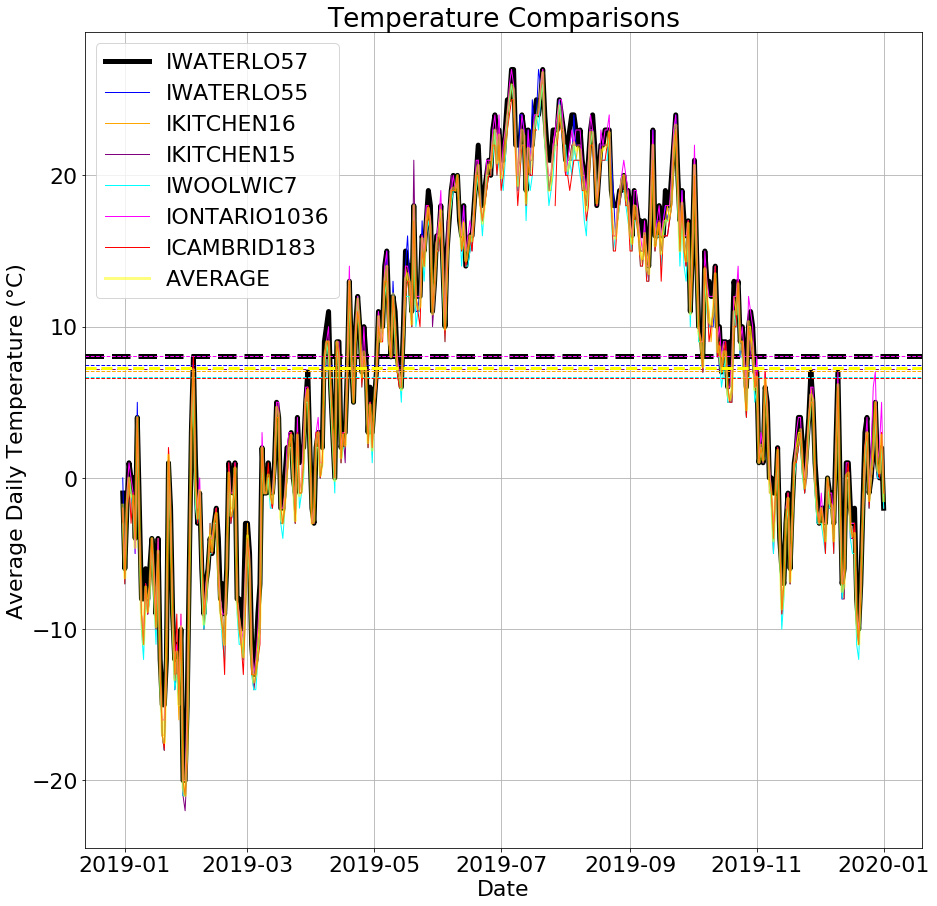

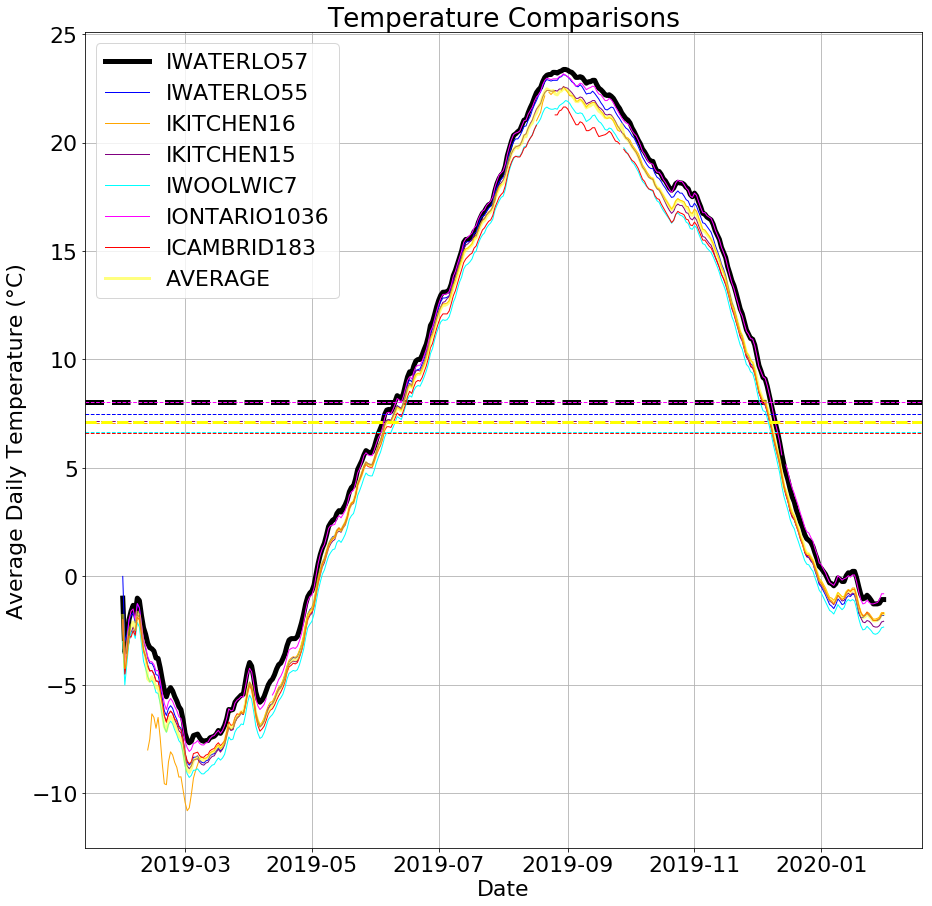

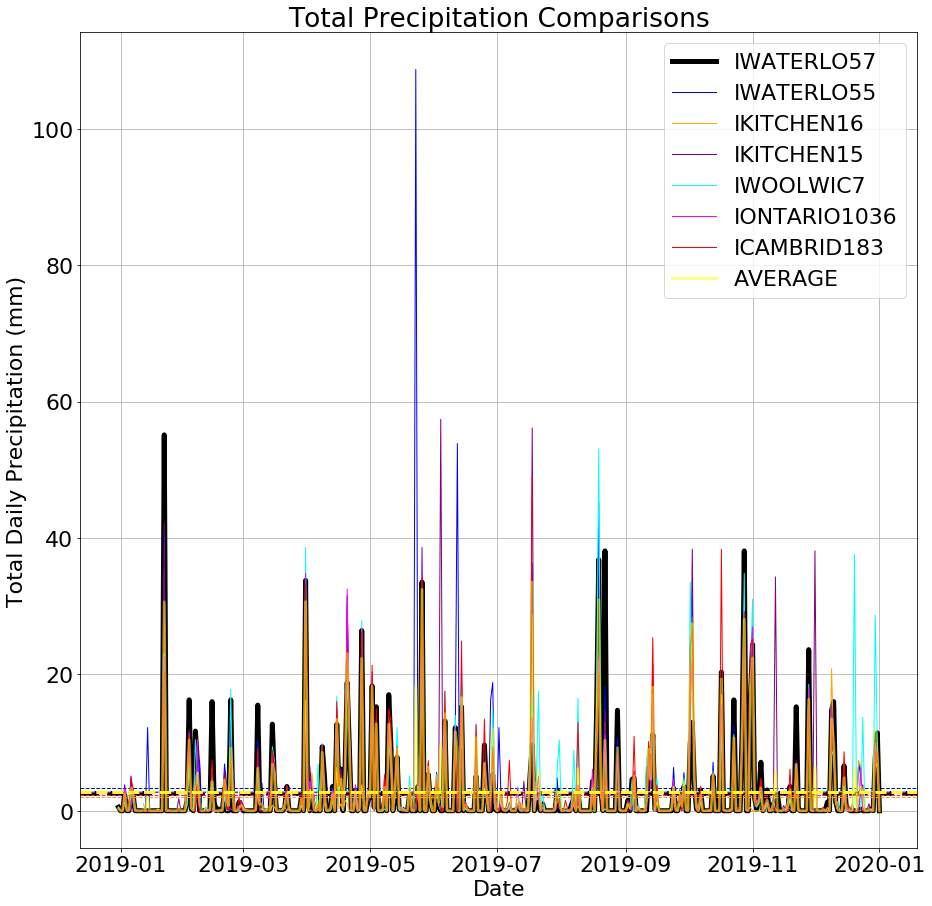

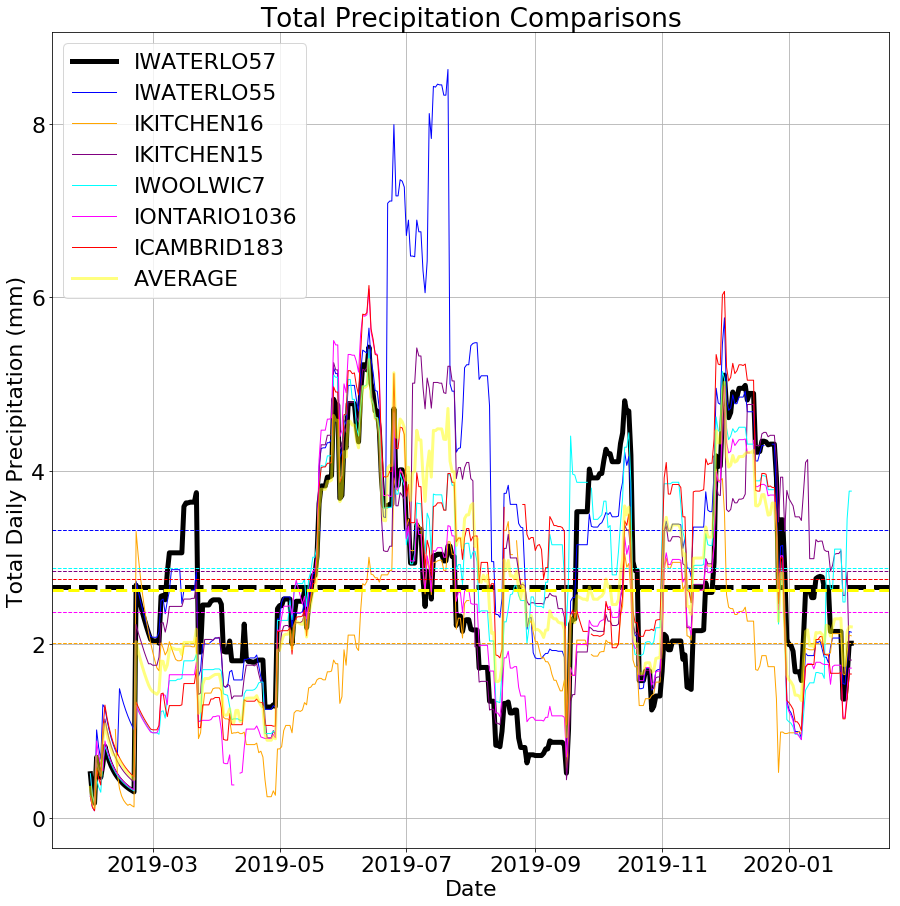

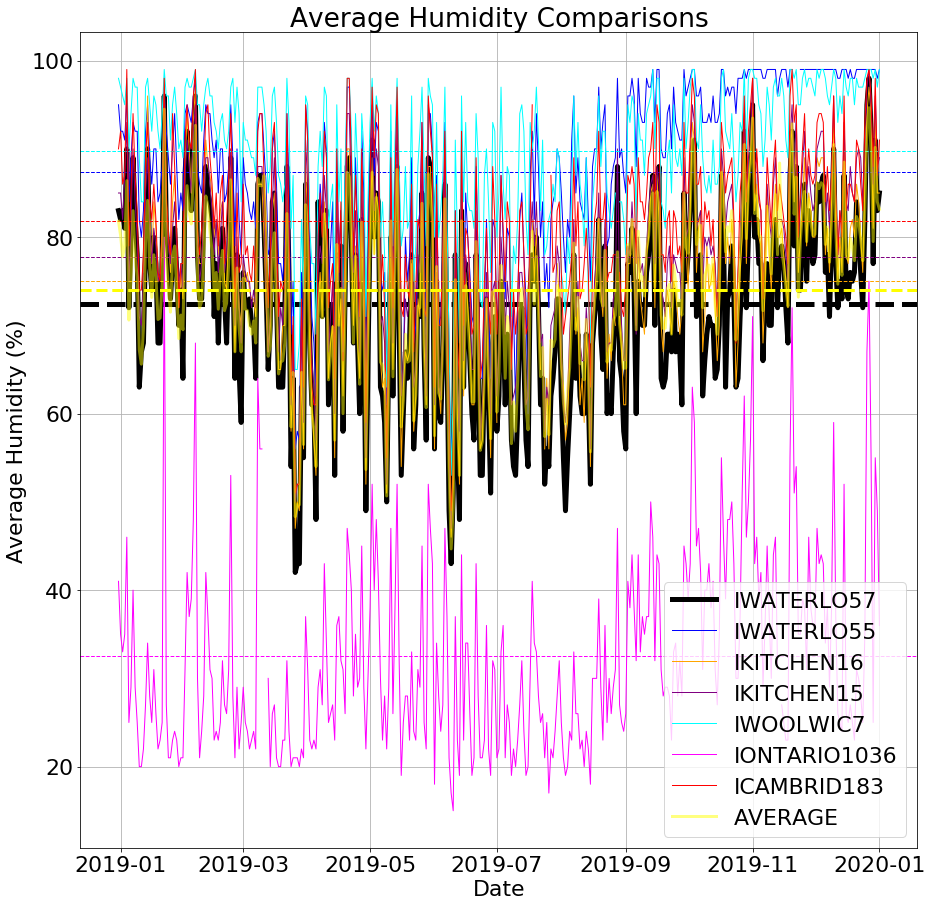

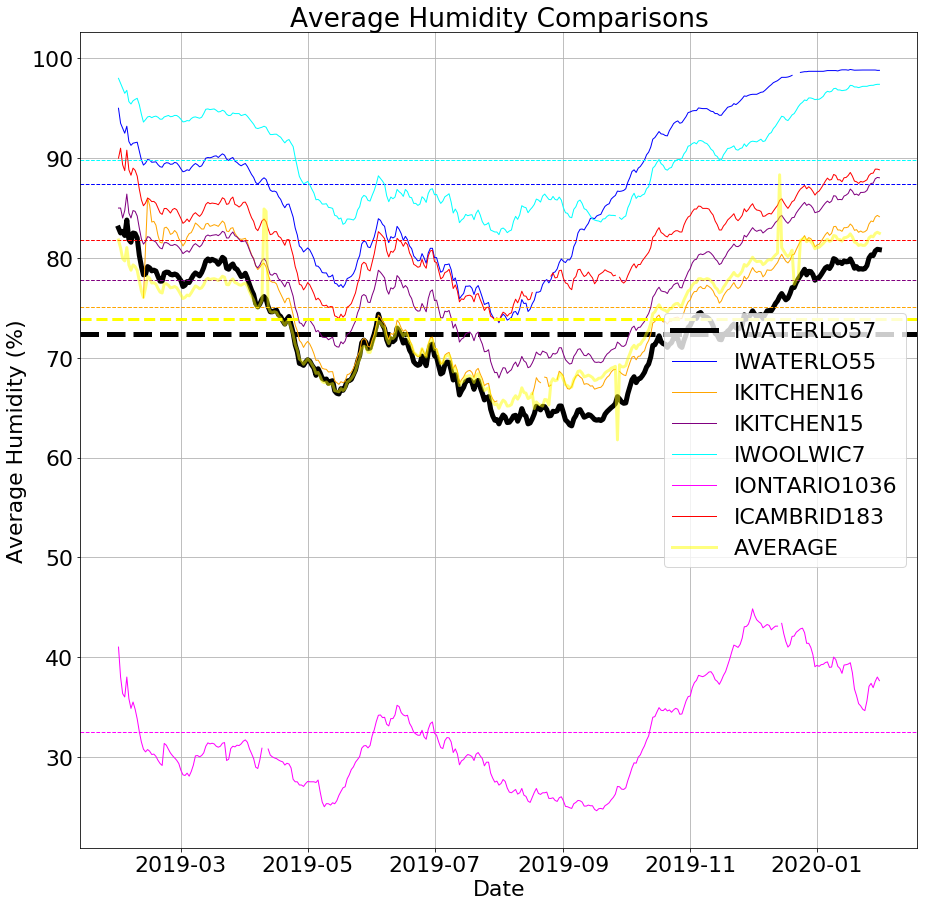

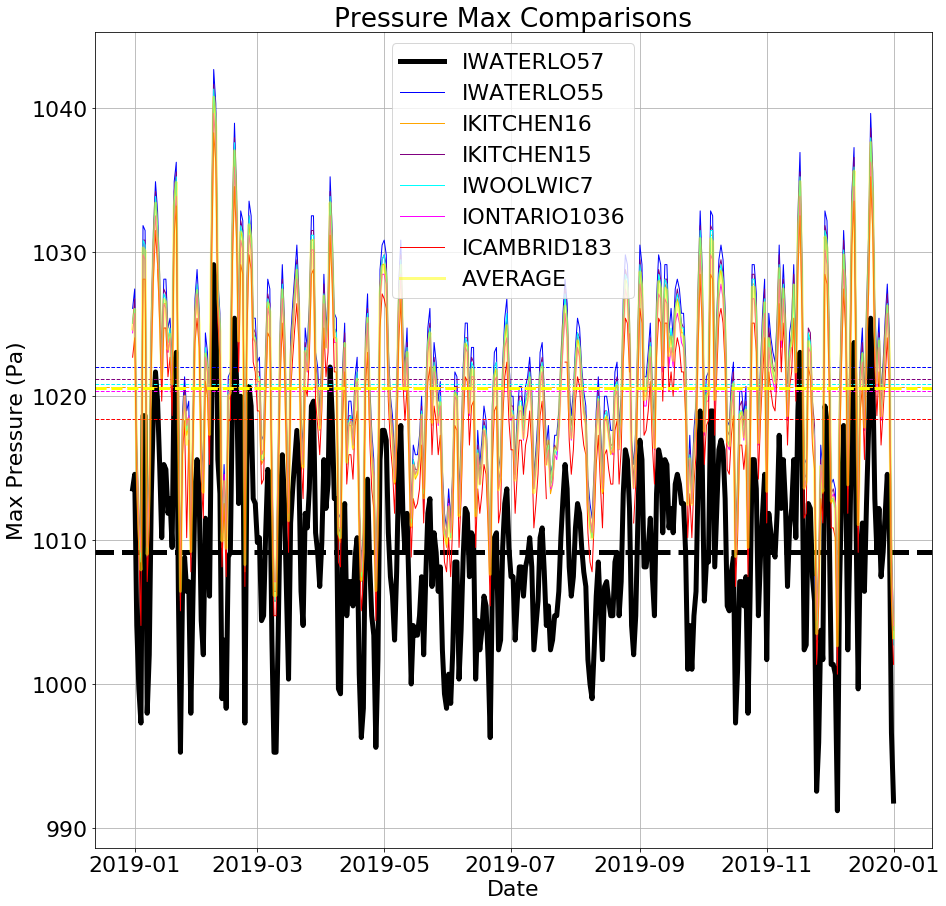

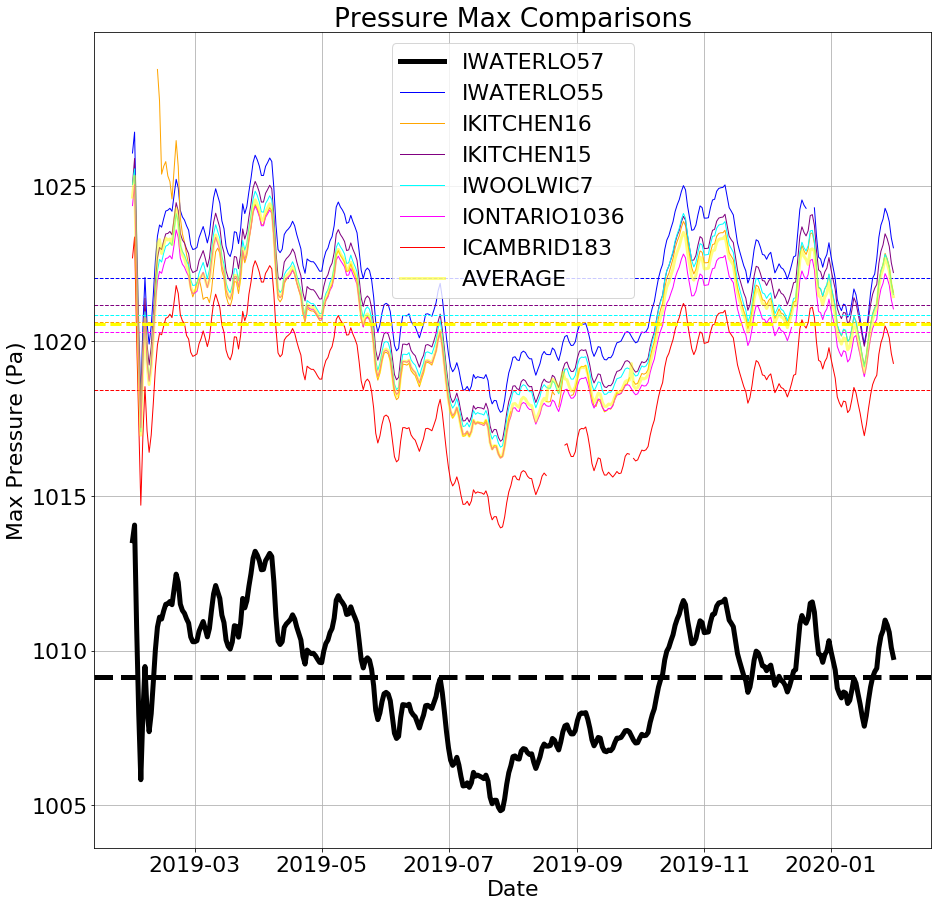

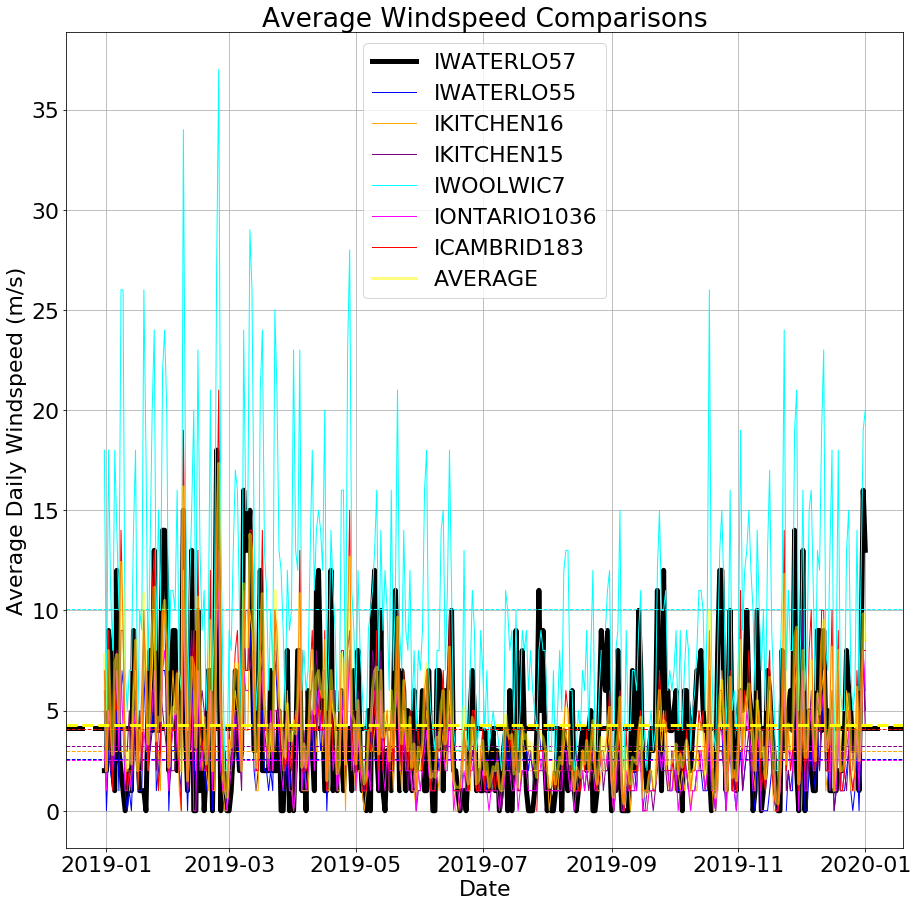

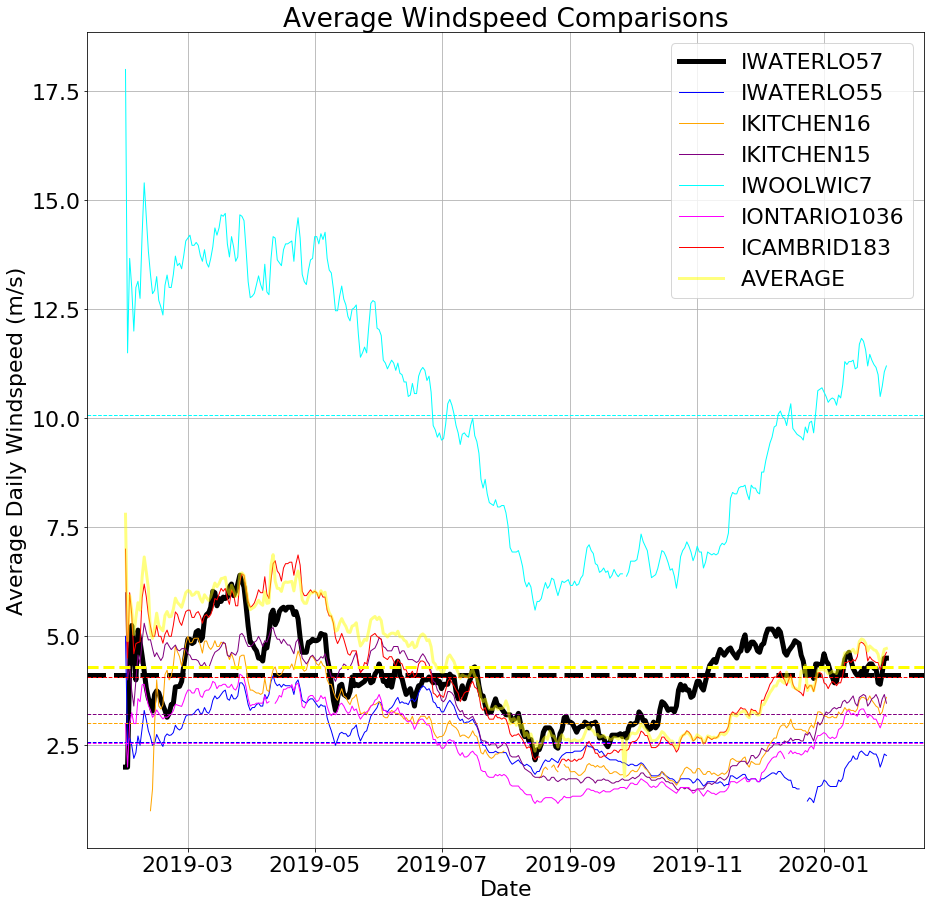

In [50]:
#### Plotting Timeseries

# plotClimaticVariable: This function makes a plot of any climatic variable from our station data
def plotClimaticVariable(metric, fig_name, fig_title, fig_xaxis, fig_yaxis, save, moving_avg):
    master_df = pd.DataFrame()
    base_case = True
    
    # Helper function
    def moving_average(a, n=30):
        ret = np.cumsum(a.filled(0))
        ret[n:] = ret[n:] - ret[:-n]
        counts = np.cumsum(~a.mask)
        counts[n:] = counts[n:] - counts[:-n]
        ret[~a.mask] /= counts[~a.mask]
        ret[a.mask] = np.nan
        return ret
    
    # Read in station data
    for station in stations:
        df = pd.DataFrame({station: pd.read_csv(station + "_data.csv")[metric].values})
        if base_case:
            master_df = df
            base_case = False
            continue
        master_df = master_df.join(df)
    
    data = master_df[my_station]
    start_day = 1
    if moving_avg:
        data = moving_average(np.ma.masked_array(master_df[my_station].to_numpy(dtype=np.float64), np.isnan(master_df[my_station].to_numpy(dtype=np.float64))))
        start_day = 31
    
    # Set up x axis (dates)
    day_indices = np.arange(data.shape[0])
    day_of_year = list(map(lambda x: datetime(study_year, 1, start_day) + timedelta(int(x) - 1), day_indices))
    moving_avg_df = pd.DataFrame()
    
    # Plot results
    fig, ax = plt.subplots(figsize=(15, 15))
    plt.rcParams.update({'font.size': 22})
    plt.grid()
    ax.set_title(fig_title)
    ax.set_xlabel(fig_xaxis)
    ax.set_ylabel(fig_yaxis)
    base_case = True
    for i, station in enumerate(stations):
        linewidth = 1
        if station == my_station:
            linewidth = 5
        data = master_df[station]
        if moving_avg:
            data = moving_average(np.ma.masked_array(master_df[station].to_numpy(dtype=np.float64), np.isnan(master_df[station].to_numpy(dtype=np.float64))))
            df = pd.DataFrame({station: pd.read_csv(station + "_data.csv")[metric].values})
        if base_case:
            moving_avg_df = pd.DataFrame({station: data})
            base_case = False
        else:
            moving_avg_df = moving_avg_df.join(pd.DataFrame({station: data}))
        ax.plot(day_of_year, data, label=station, color=colors[i], linewidth=linewidth)
        ax.axhline(np.nanmean(master_df[station]), linestyle="--", color=colors[i], linewidth=linewidth)
        
    # Plot Mean
    master_df = master_df.drop(columns=['IWATERLO57'])
    data = master_df.mean(axis=1)
    if moving_avg:
        moving_avg_df = moving_avg_df.drop(columns=['IWATERLO57'])
        data = moving_avg_df.mean(axis=1)
    ax.plot(day_of_year, data, label="AVERAGE", color="Yellow", linewidth=3, alpha=0.5)
    ax.axhline(np.nanmean(data), linestyle="--", color="Yellow", linewidth=3)
        
    ax.legend()
    if save:
        fig.savefig(figname, transparent=True)

# Run plots (daily and 30 day running mean)
plotClimaticVariable('metric.tempAvg', 'temp_comparisons.png', 'Temperature Comparisons', "Date", "Average Daily Temperature (°C)", False, False)
plotClimaticVariable('metric.tempAvg', 'temp_comparisons.png', 'Temperature Comparisons', "Date", "Average Daily Temperature (°C)", False, True)
plotClimaticVariable('metric.precipTotal', 'precip_comparisons.png', 'Total Precipitation Comparisons', "Date", "Total Daily Precipitation (mm)", False, False)
plotClimaticVariable('metric.precipTotal', 'precip_comparisons.png', 'Total Precipitation Comparisons', "Date", "Total Daily Precipitation (mm)", False, True)
plotClimaticVariable('humidityAvg', 'humidity_comparisons.png', 'Average Humidity Comparisons', "Date", "Average Humidity (%)", False, False)
plotClimaticVariable('humidityAvg', 'humidity_comparisons.png', 'Average Humidity Comparisons', "Date", "Average Humidity (%)", False, True)
plotClimaticVariable('metric.pressureMax', 'pressure_comparisons.png', 'Pressure Max Comparisons', "Date", "Max Pressure (Pa)", False, False)
plotClimaticVariable('metric.pressureMax', 'pressure_comparisons.png', 'Pressure Max Comparisons', "Date", "Max Pressure (Pa)", False, True)
plotClimaticVariable('metric.windspeedAvg', 'wind_comparisons.png', 'Average Windspeed Comparisons', "Date", "Average Daily Windspeed (m/s)", False, False)
plotClimaticVariable('metric.windspeedAvg', 'wind_comparisons.png', 'Average Windspeed Comparisons', "Date", "Average Daily Windspeed (m/s)", False, True)

### SPONGE
# PRINT STATS
# LOOK AT CLIMATOLOGIES



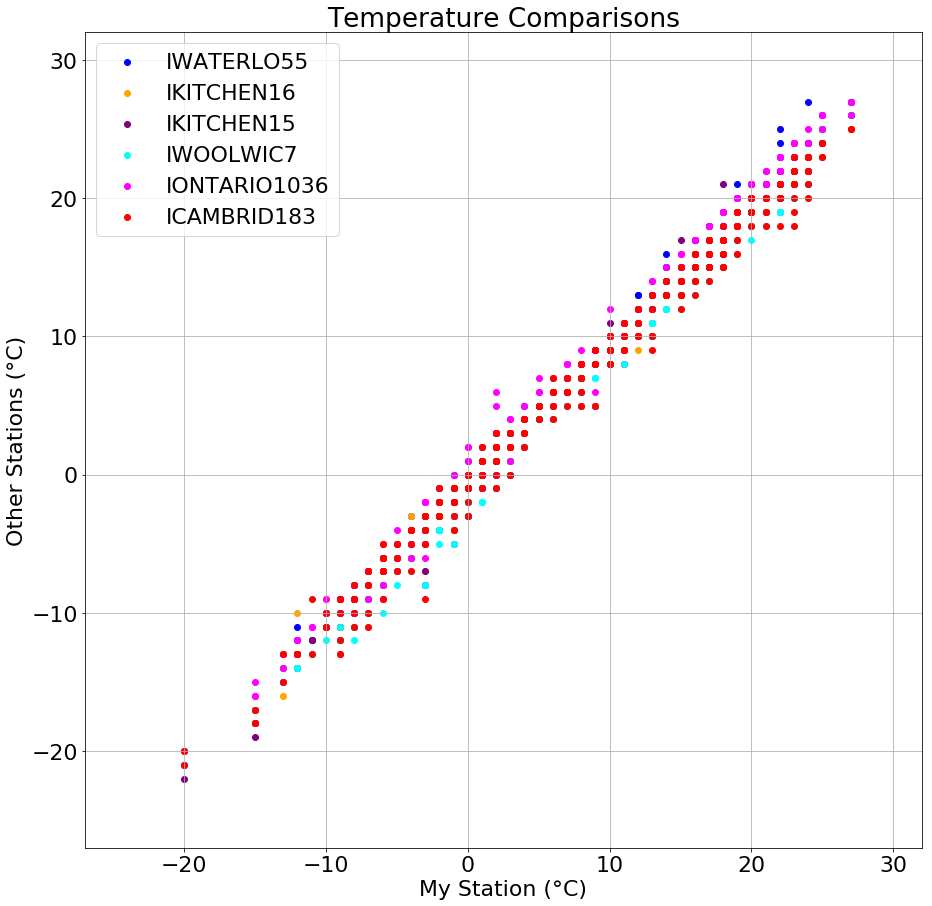

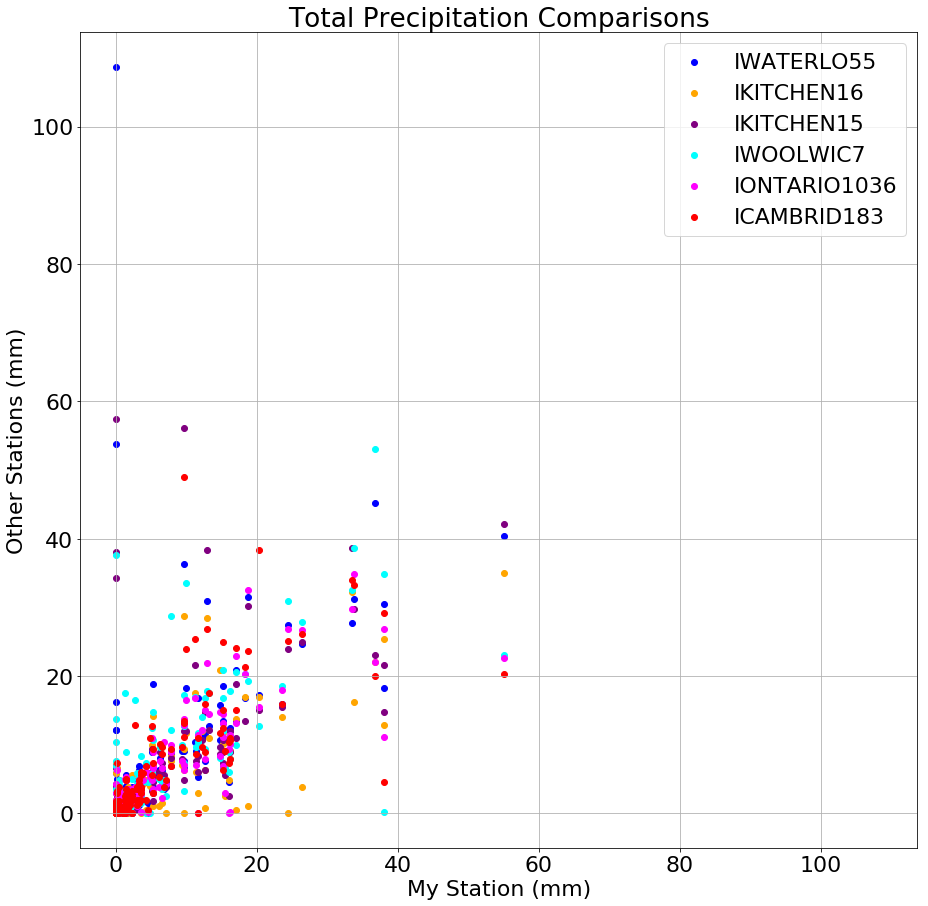

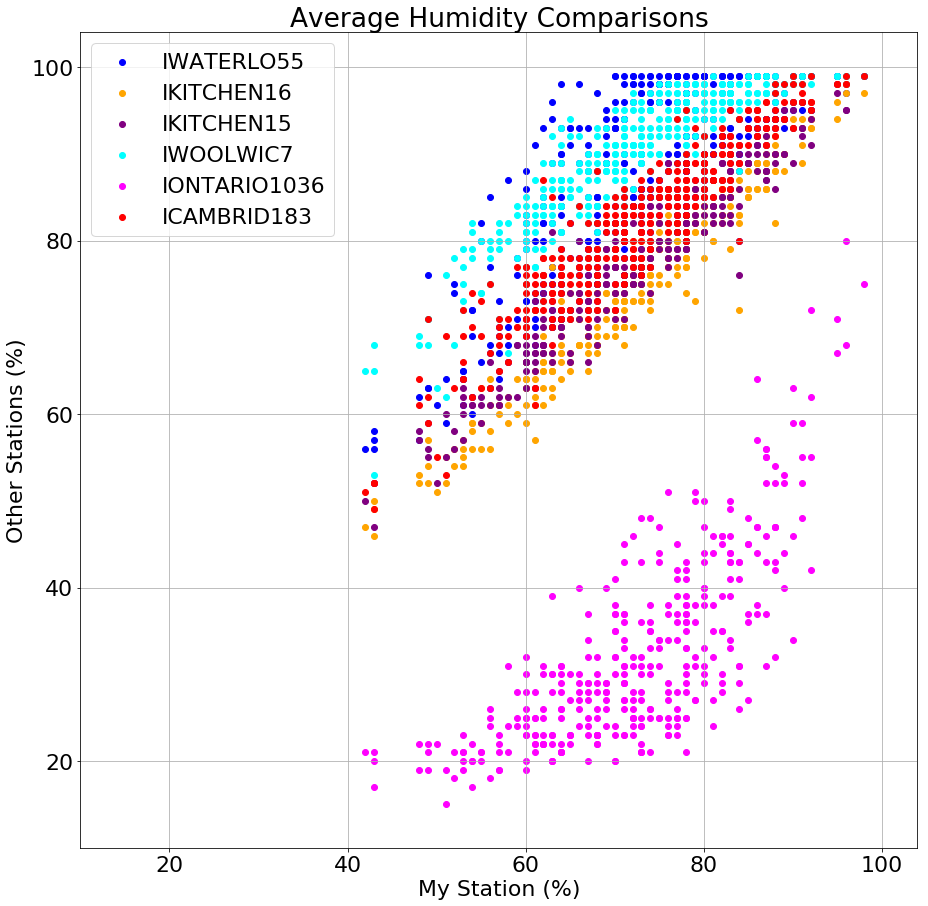

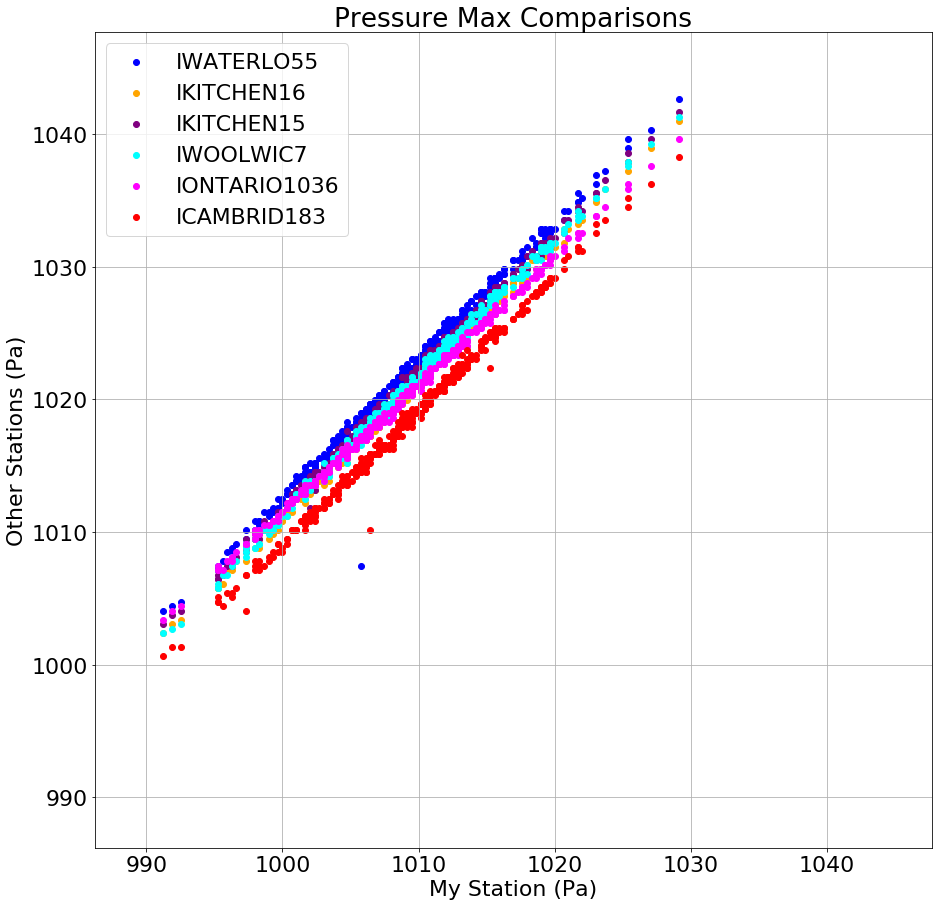

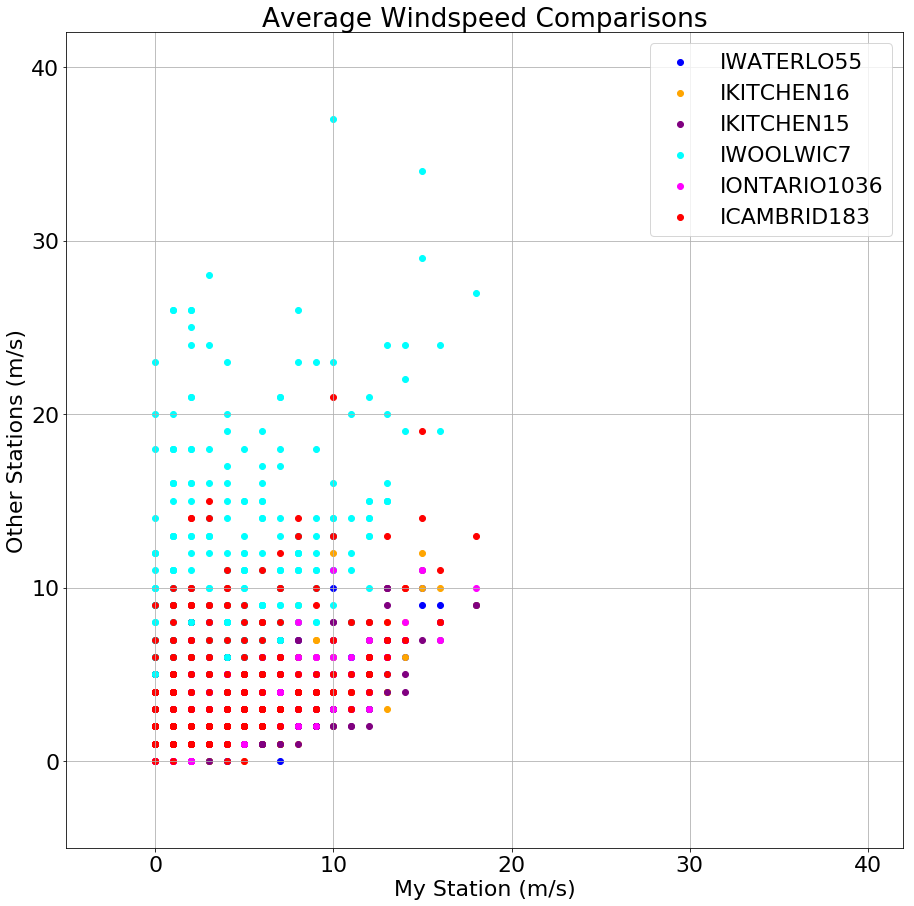

In [17]:
#### Plotting Timeseries

# plotClimaticVariable: This function makes a plot of any climatic variable from our station data
def climScatter(metric, fig_name, fig_title, fig_xaxis, fig_yaxis, save):
    master_df = pd.DataFrame()
    base_case = True
    
    # Read in station data
    for station in stations:
        df = pd.DataFrame({station: pd.read_csv(station + "_data.csv")[metric].values})
        if base_case:
            master_df = df
            base_case = False
            continue
        master_df = master_df.join(df)
            
    # Plot results
    fig, ax = plt.subplots(figsize=(15, 15))
    plt.rcParams.update({'font.size': 22})
    plt.grid()
    ax.set_xlim((min(master_df.min()))-5, max(master_df.max())+5)
    ax.set_ylim((min(master_df.min()))-5, max(master_df.max())+5)
    ax.set_title(fig_title)
    ax.set_xlabel(fig_xaxis)
    ax.set_ylabel(fig_yaxis)
    for i, station in enumerate(stations):
        if station == my_station:
            continue
        my_data = master_df[my_station]
        data = master_df[station]
        ax.scatter(my_data, data, label=station, color=colors[i])
    ax.legend()
    if save:
        fig.savefig(figname, transparent=True)

# Run plots
climScatter('metric.tempAvg', 'temp_comparisons.png', 'Temperature Comparisons', "My Station (°C)", "Other Stations (°C)", False)
climScatter('metric.precipTotal', 'precip_comparisons.png', 'Total Precipitation Comparisons', "My Station (mm)", "Other Stations (mm)", False)
climScatter('humidityAvg', 'humidity_comparisons.png', 'Average Humidity Comparisons', "My Station (%)", "Other Stations (%)", False)
climScatter('metric.pressureMax', 'pressure_comparisons.png', 'Pressure Max Comparisons', "My Station (Pa)", "Other Stations (Pa)", False)
climScatter('metric.windspeedAvg', 'wind_comparisons.png', 'Average Windspeed Comparisons', "My Station (m/s)", "Other Stations (m/s)", False)

